In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_4_stride_4_2_noDO_decode_B1H_Inst_min_max_rolling_avg_window_65_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           384       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

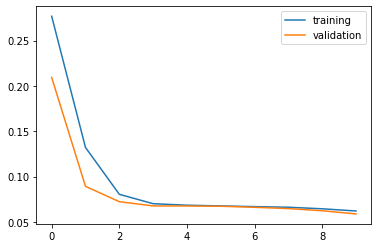

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [0 1 2]
group_bunches: [ 314.  360. 2418.]
group_bunches sorted: [ 314.  360. 2418.]
restore_index: [0 1 2]
group_bunches restored: [ 314.  360. 2418.]
bunch_sorted_index: [1 0 3 2]
group_bunches: [1419.  956. 2629. 2106.]
group_bunches sorted: [ 956. 1419. 2106. 2629.]
restore_index: [1 0 3 2]
group_bunches restored: [1419.  956. 2629. 2106.]

50/50 [==============================] - 86s 2s/step


In [10]:
train_meta.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length,chunk
4845,Inst,6272,1,h,7,2017-10-05 13:08:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...,1836,2808.0,1493.0,65536,18
158,Inst,6922,1,h,7,2018-07-14 19:09:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6922/...,288,305.0,204.0,65536,0
1469,Inst,6892,1,h,7,2018-07-07 01:17:34,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6892/...,588,968.0,404.0,65536,5
945,Inst,6255,1,h,7,2017-09-29 06:20:31,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...,1412,624.0,339.0,65536,3
3037,Inst,6630,1,h,7,2018-05-02 01:10:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6630/...,926,1343.0,792.0,65536,11


In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 1)

In [13]:
train_prediction.shape

(396800, 2048, 1)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 11s 2s/step


In [15]:
validation_meta.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length,chunk
4808,Inst,6184,1,h,7,2017-09-09 23:55:12,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...,1412,433.0,230.0,65536,18
1244,Inst,7487,1,h,7,2018-11-30 19:02:41,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...,460,55.0,6.0,65536,4
5767,Inst,6272,1,h,7,2017-10-05 09:37:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...,1836,2823.0,1504.0,65536,22
7206,Inst,6890,1,h,7,2018-07-06 00:10:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...,1452,524.0,209.0,65536,28
7624,Inst,6184,1,h,7,2017-09-09 23:55:12,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...,1412,433.0,230.0,65536,29


In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 1)

In [18]:
validation_prediction.shape

(39680, 2048, 1)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

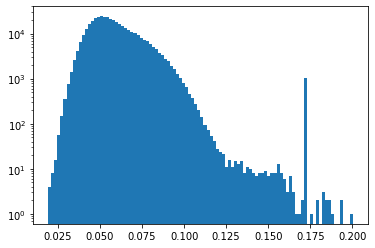

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

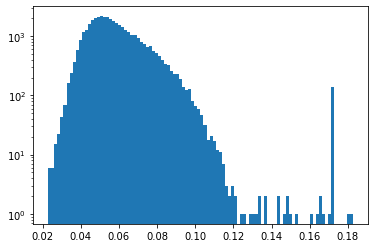

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.03408372646628029
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 13:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                    1836
bunch_index                                                  2808
bunch_number                                                 1493
ts_length                                                   65536
chunk                                                          18
Name: 4845, dtype: object


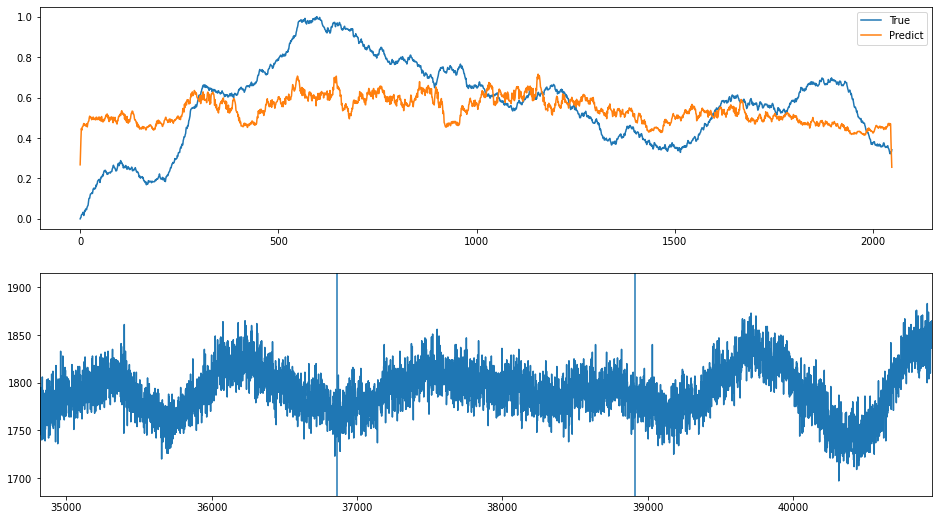

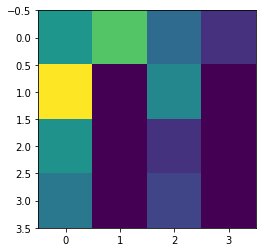

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 324084
Error: 0.0193017018102105
type                                                         Inst
fill                                                         7137
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 15:13:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7137/...
n_bunches                                                    2555
bunch_index                                                  1300
bunch_number                                                  946
ts_length                                                   65536
chunk                                                          12
Name: 3196, dtype: object


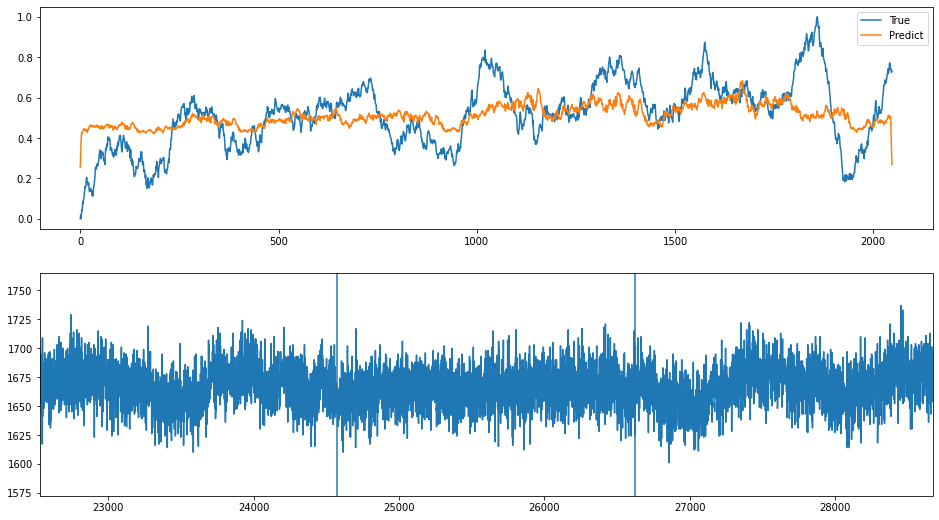

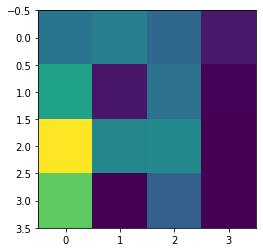

index: 155708
Error: 0.020059627590848166
type                                                         Inst
fill                                                         7078
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-23 14:07:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7078/...
n_bunches                                                     252
bunch_index                                                   290
bunch_number                                                  196
ts_length                                                   65536
chunk                                                          23
Name: 5945, dtype: object


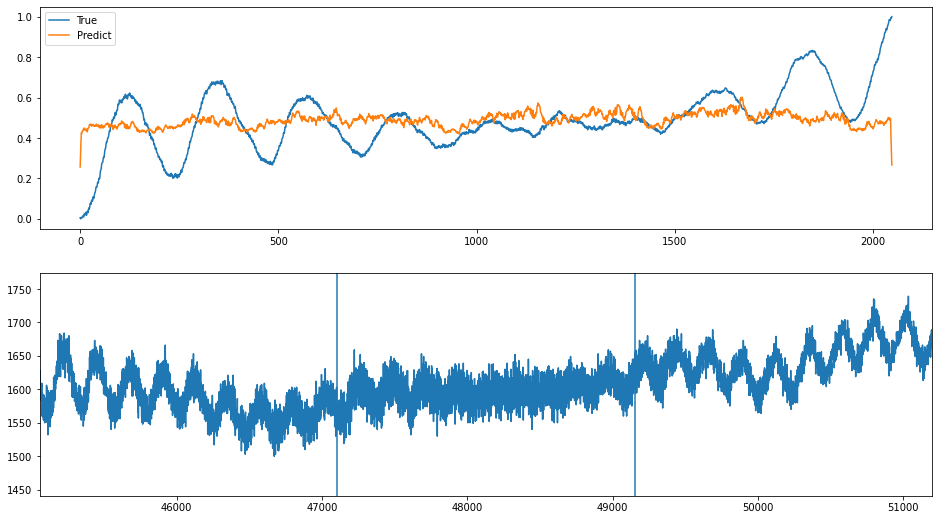

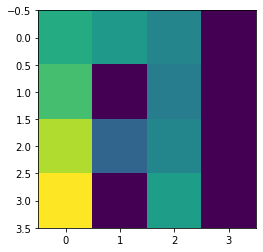

index: 275557
Error: 0.020337742800950513
type                                                         Inst
fill                                                         7362
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 16:44:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7362/...
n_bunches                                                     157
bunch_index                                                   399
bunch_number                                                  148
ts_length                                                   65536
chunk                                                          26
Name: 6823, dtype: object


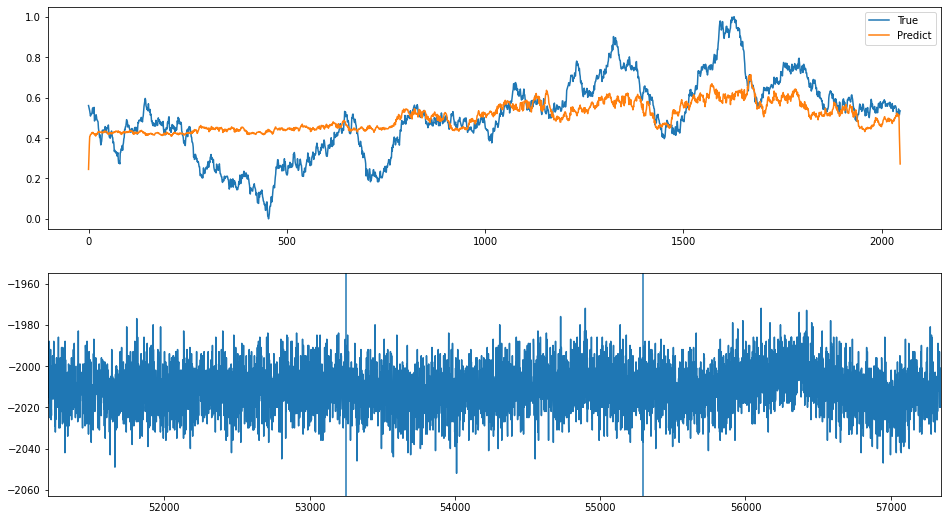

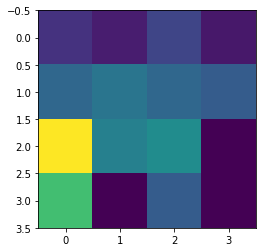

index: 171405
Error: 0.02048536159780578
type                                                         Inst
fill                                                         7454
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-19 02:05:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7454/...
n_bunches                                                     648
bunch_index                                                   942
bunch_number                                                  170
ts_length                                                   65536
chunk                                                          23
Name: 6024, dtype: object


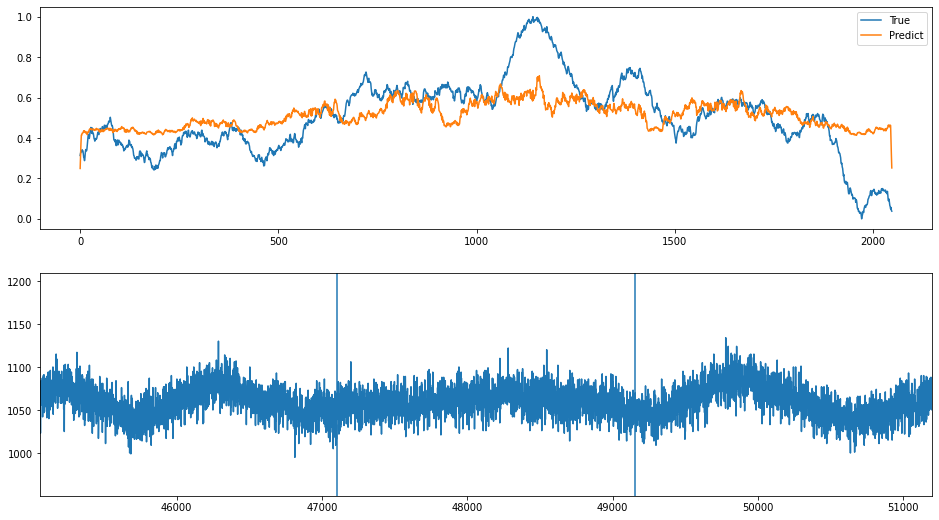

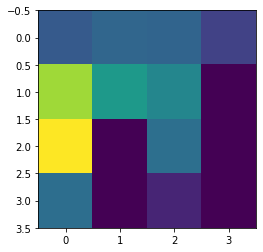

index: 183300
Error: 0.021128281014481144
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 22:48:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                  1363
bunch_number                                                  718
ts_length                                                   65536
chunk                                                           3
Name: 986, dtype: object


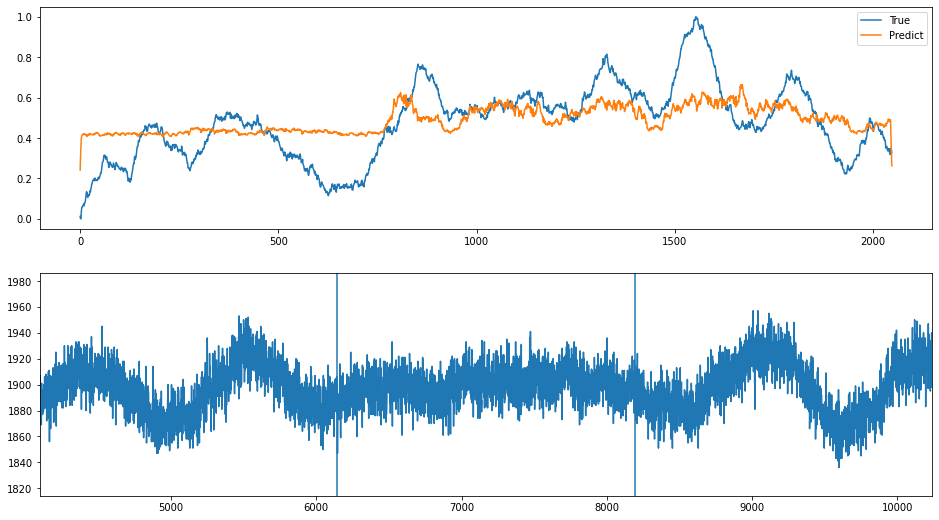

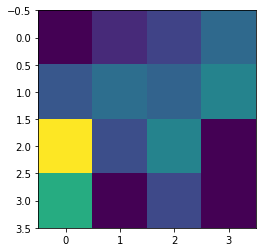

index: 108931
Error: 0.021233842897747185
type                                                         Inst
fill                                                         7366
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-27 03:59:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7366/...
n_bunches                                                    1812
bunch_index                                                  2669
bunch_number                                                 1392
ts_length                                                   65536
chunk                                                           4
Name: 1181, dtype: object


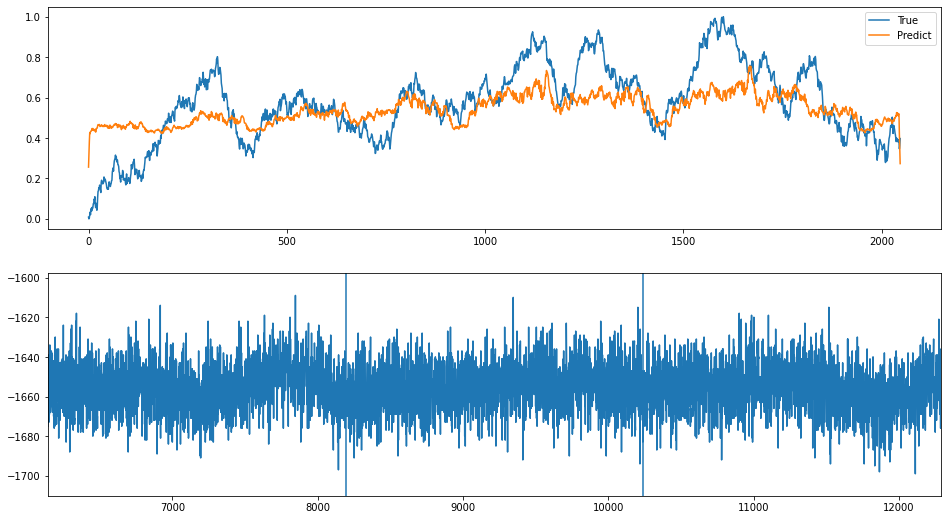

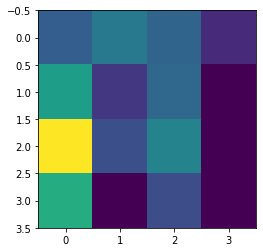

index: 37225
Error: 0.02138705432710867
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 13:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                    1836
bunch_index                                                   140
bunch_number                                                   63
ts_length                                                   65536
chunk                                                          25
Name: 6445, dtype: object


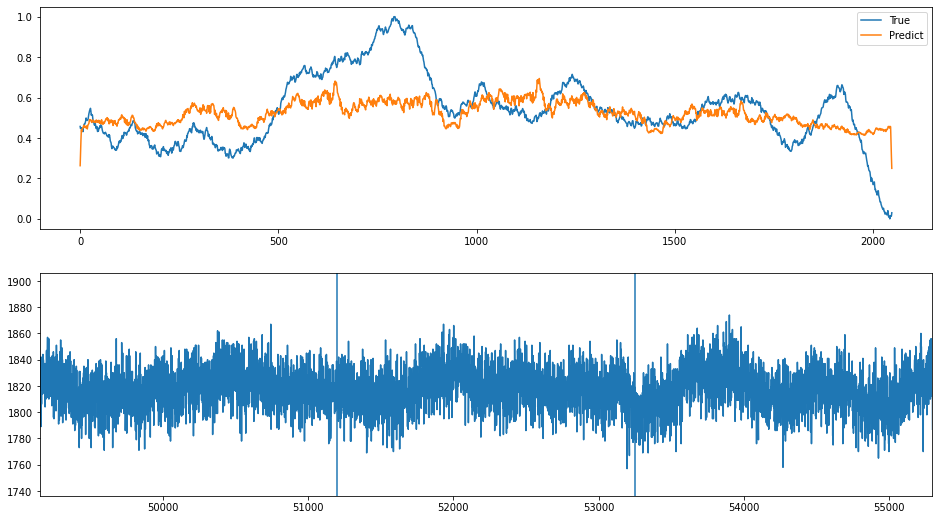

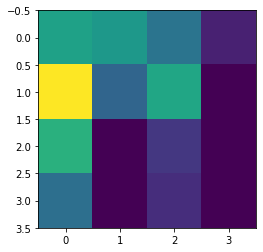

index: 197738
Error: 0.02228173085100309
type                                                         Inst
fill                                                         6748
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 00:52:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6748/...
n_bunches                                                      12
bunch_index                                                    46
bunch_number                                                    9
ts_length                                                   65536
chunk                                                           8
Name: 2150, dtype: object


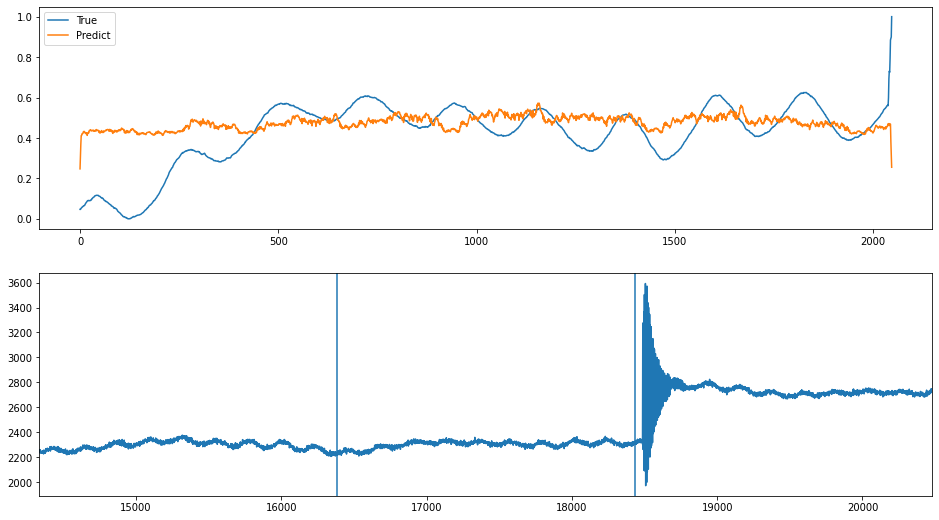

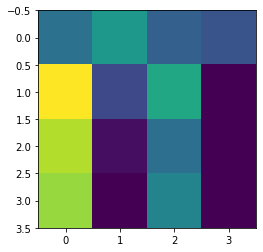

index: 267283
Error: 0.022326520900808083
type                                                         Inst
fill                                                         6690
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 07:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...
n_bunches                                                    1227
bunch_index                                                  2319
bunch_number                                                  876
ts_length                                                   65536
chunk                                                          22
Name: 5882, dtype: object


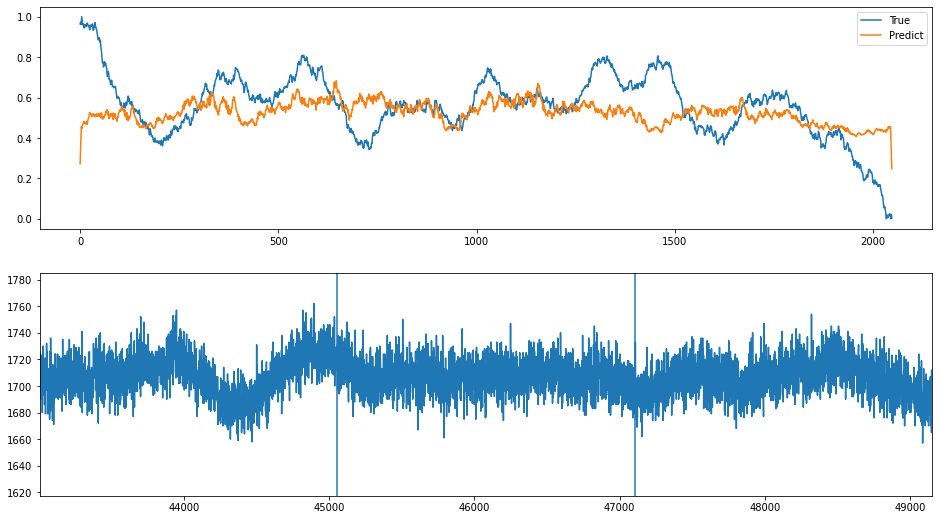

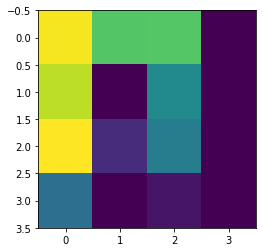

index: 353086
Error: 0.022481236287615787
type                                                         Inst
fill                                                         7365
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-27 00:19:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7365/...
n_bunches                                                     852
bunch_index                                                    62
bunch_number                                                   13
ts_length                                                   65536
chunk                                                          19
Name: 5051, dtype: object


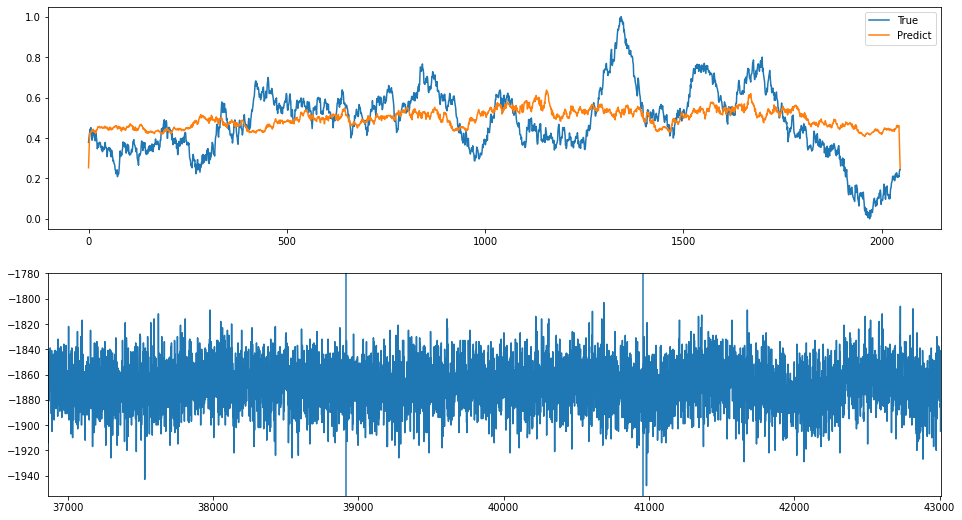

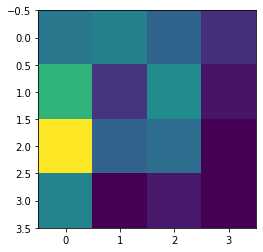

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 197030
Error: 0.20012133811461275
type                                                         Inst
fill                                                         6680
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-14 06:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6680/...
n_bunches                                                     264
bunch_index                                                  1036
bunch_number                                                  223
ts_length                                                   65536
chunk                                                          28
Name: 7384, dtype: object


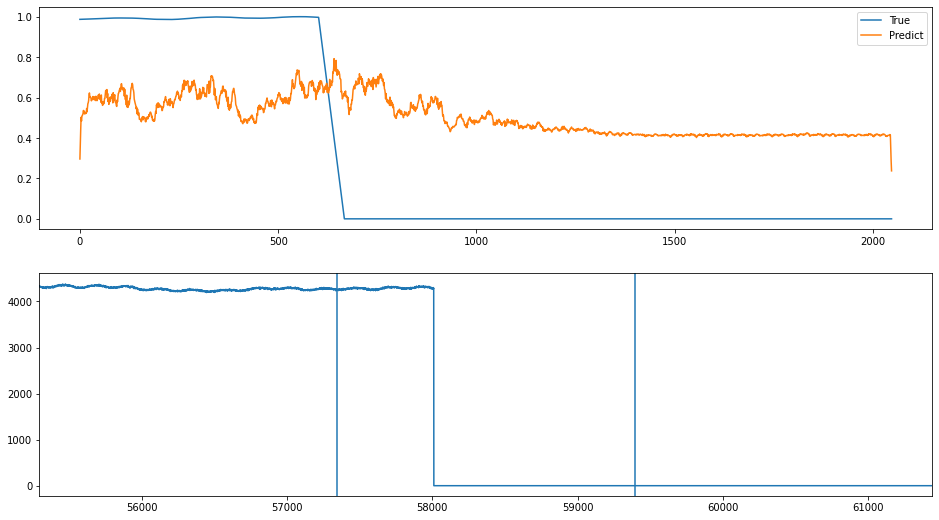

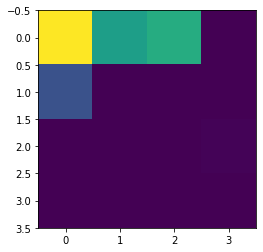

index: 184593
Error: 0.1938881098539627
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  1082
bunch_number                                                  218
ts_length                                                   65536
chunk                                                           7
Name: 1916, dtype: object


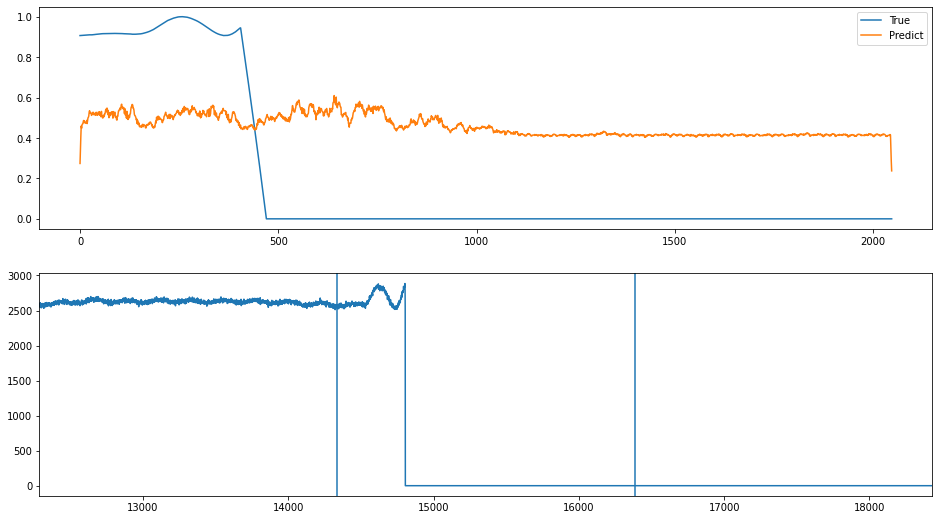

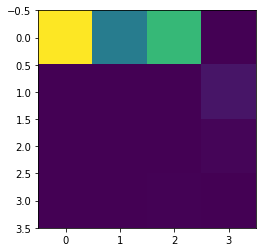

index: 273634
Error: 0.19381592414617724
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2294
bunch_number                                                  482
ts_length                                                   65536
chunk                                                           7
Name: 2027, dtype: object


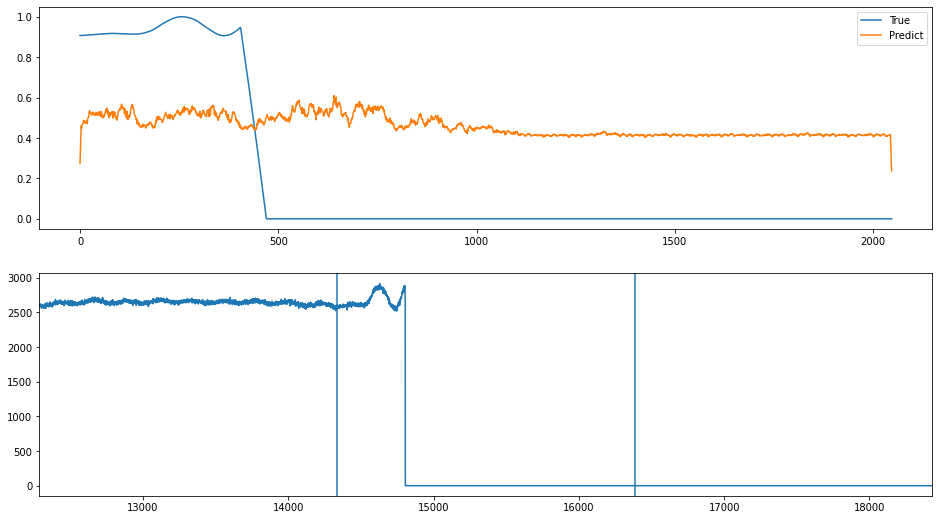

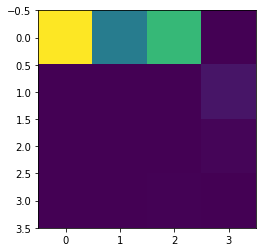

index: 297310
Error: 0.18769938948053233
type                                                         Inst
fill                                                         6370
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-09 01:20:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6370/...
n_bunches                                                     908
bunch_index                                                  1597
bunch_number                                                  869
ts_length                                                   65536
chunk                                                           2
Name: 716, dtype: object


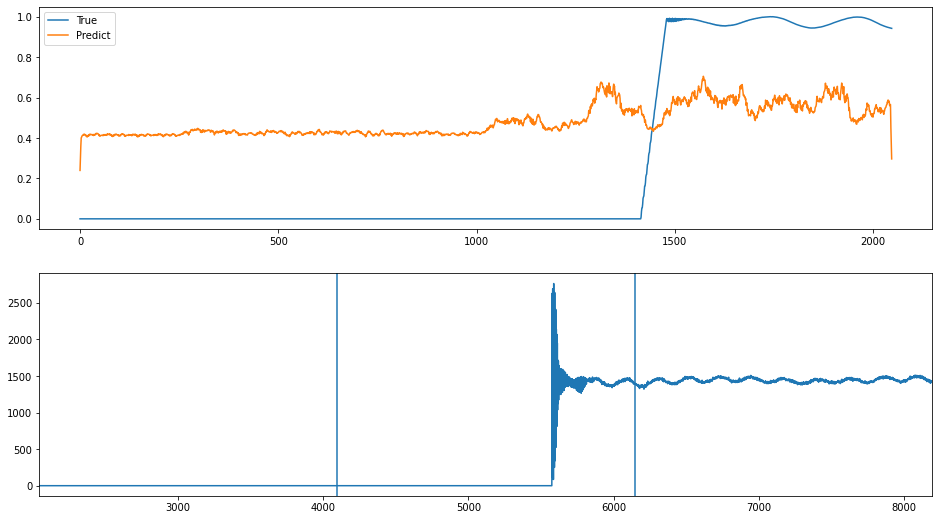

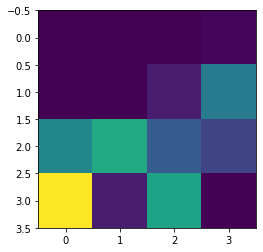

index: 92321
Error: 0.18651428786282276
type                                                         Inst
fill                                                         7483
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-29 01:24:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...
n_bunches                                                     372
bunch_index                                                  1851
bunch_number                                                  342
ts_length                                                   65536
chunk                                                          10
Name: 2730, dtype: object


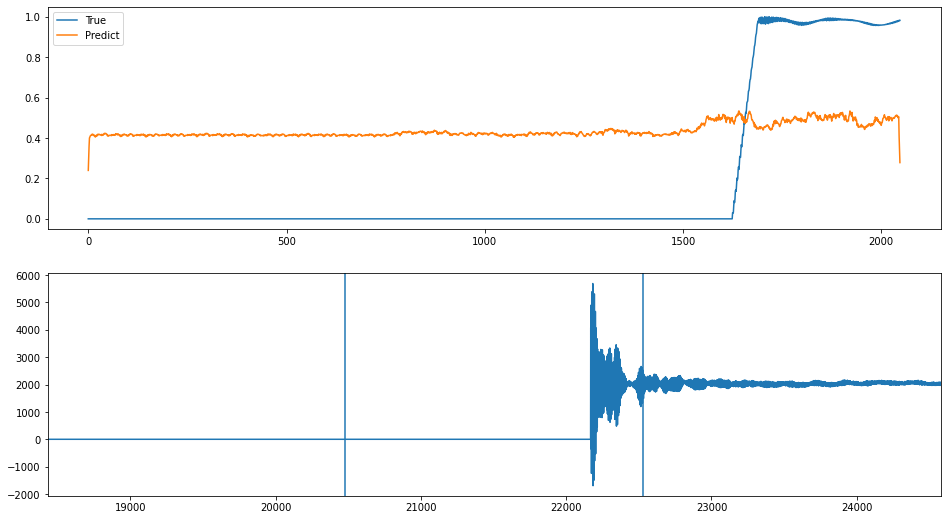

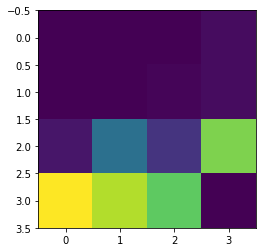

index: 333324
Error: 0.18650150382164593
type                                                         Inst
fill                                                         6268
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-03 12:26:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6268/...
n_bunches                                                     396
bunch_index                                                   612
bunch_number                                                  315
ts_length                                                   65536
chunk                                                           1
Name: 448, dtype: object


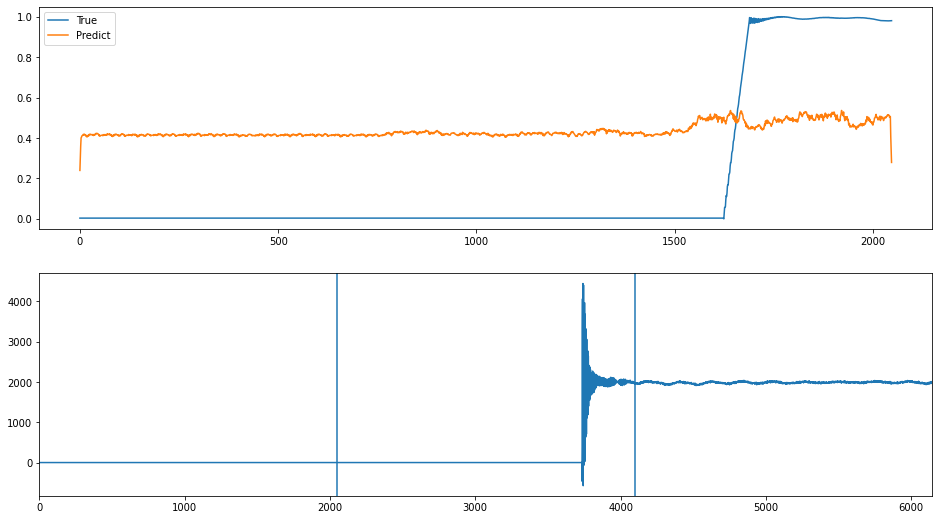

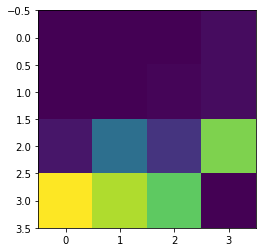

index: 33286
Error: 0.18472564562828364
type                                                         Inst
fill                                                         7354
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 20:13:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7354/...
n_bunches                                                     348
bunch_index                                                   685
bunch_number                                                  310
ts_length                                                   65536
chunk                                                          11
Name: 3021, dtype: object


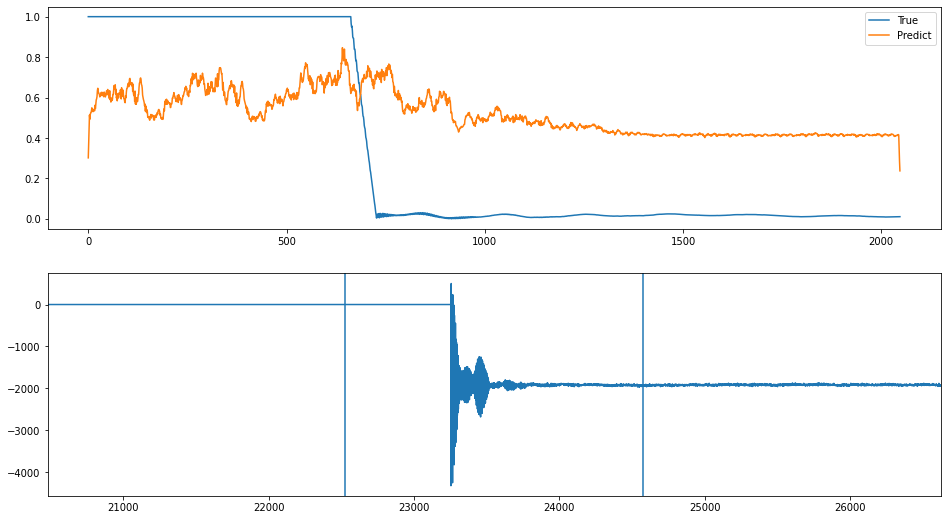

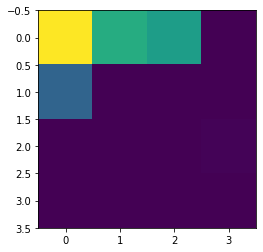

index: 60261
Error: 0.18392425691390024
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 22:30:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                     300
bunch_index                                                   405
bunch_number                                                  210
ts_length                                                   65536
chunk                                                           5
Name: 1390, dtype: object


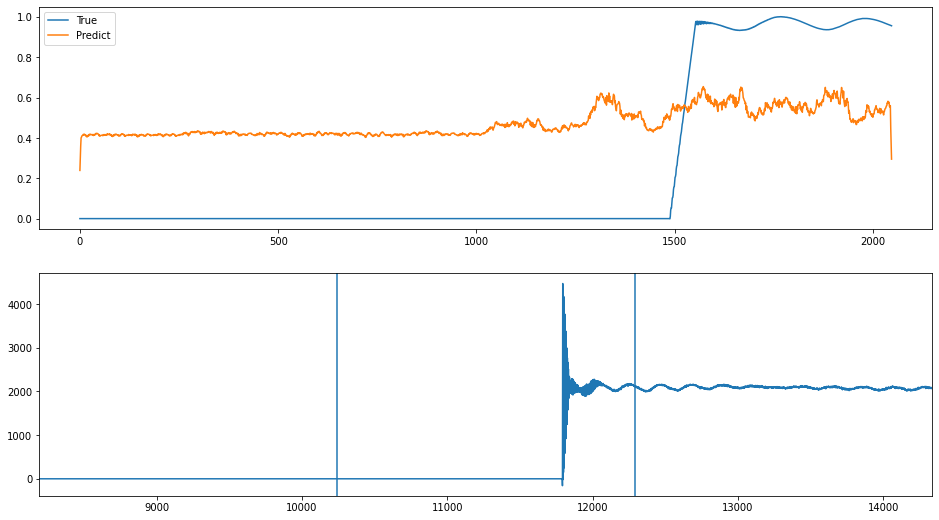

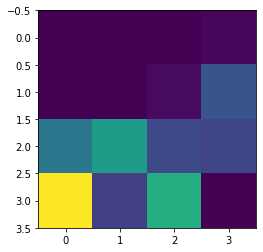

index: 259909
Error: 0.1833664901566679
type                                                         Inst
fill                                                         6394
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 17:38:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6394/...
n_bunches                                                     876
bunch_index                                                  1462
bunch_number                                                  754
ts_length                                                   65536
chunk                                                           5
Name: 1477, dtype: object


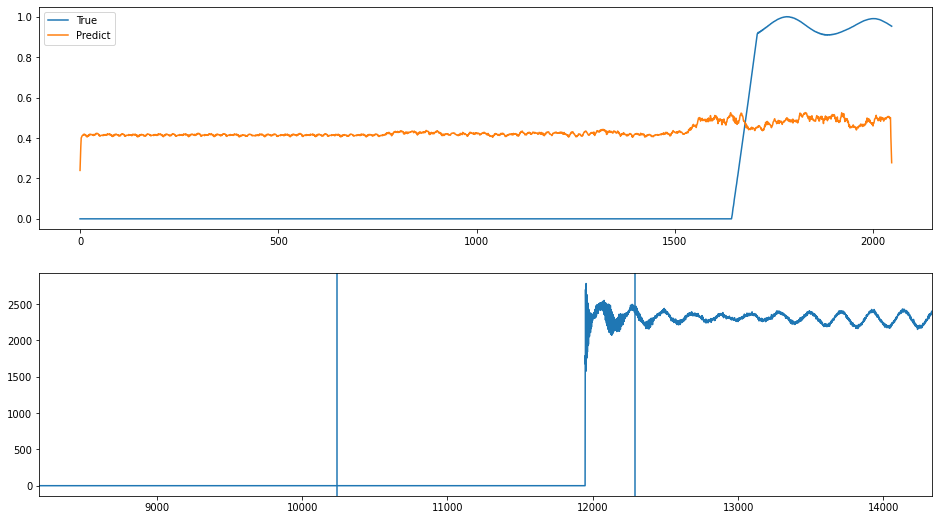

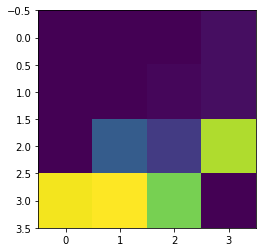

index: 153274
Error: 0.18314319146822894
type                                                         Inst
fill                                                         6413
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-23 19:28:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6413/...
n_bunches                                                     428
bunch_index                                                   612
bunch_number                                                  324
ts_length                                                   65536
chunk                                                           5
Name: 1483, dtype: object


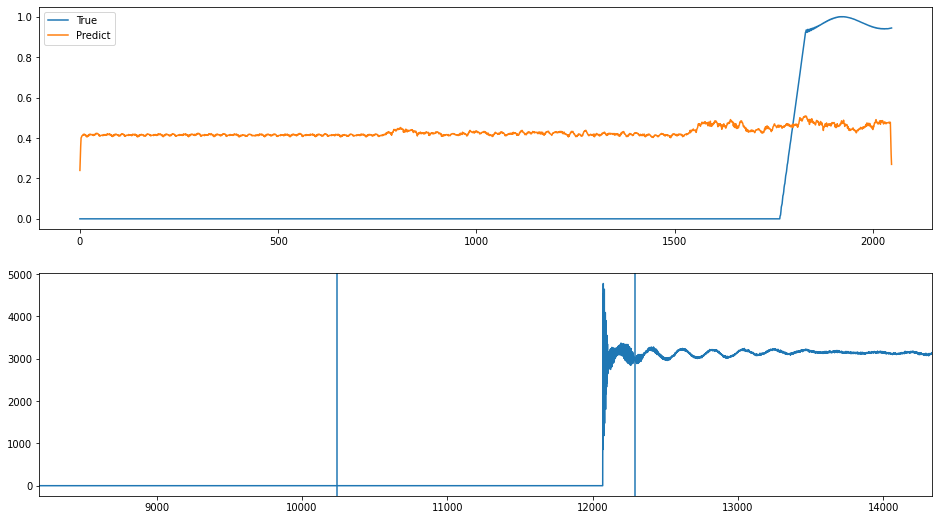

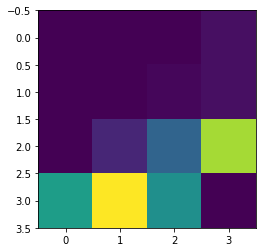

index: 323496
Error: 0.18262234557656748
type                                                         Inst
fill                                                         6398
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-19 21:15:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6398/...
n_bunches                                                    1164
bunch_index                                                  2542
bunch_number                                                 1058
ts_length                                                   65536
chunk                                                           4
Name: 1097, dtype: object


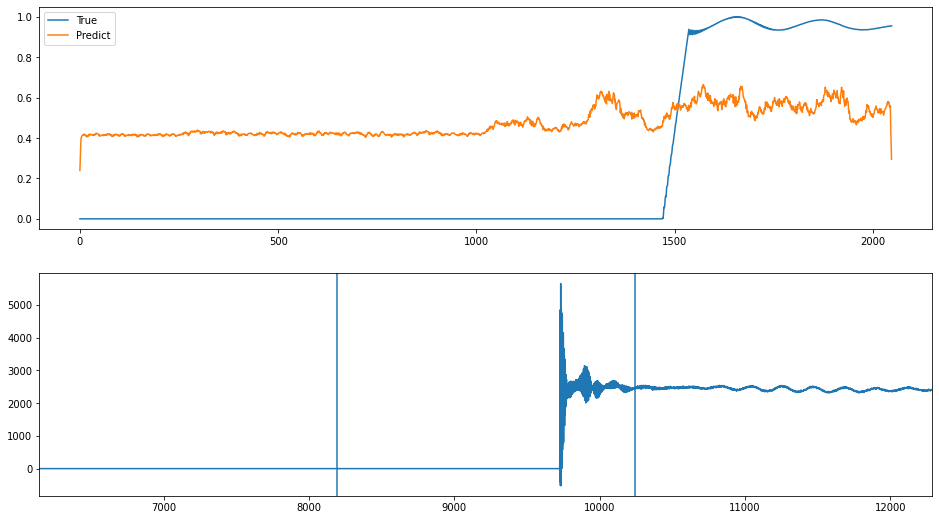

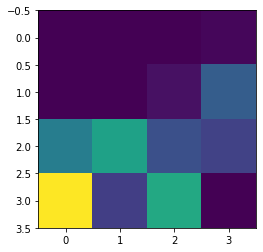

index: 364695
Error: 0.1797292304477729
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:38:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                    1596
bunch_index                                                  2093
bunch_number                                                 1554
ts_length                                                   65536
chunk                                                           4
Name: 1150, dtype: object


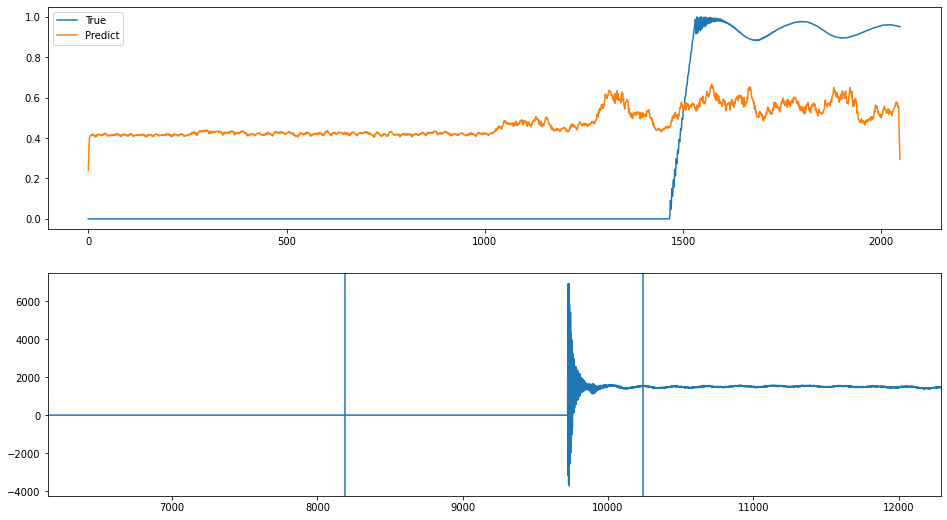

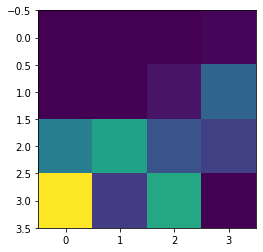

index: 16106
Error: 0.17924958769493893
type                                                         Inst
fill                                                         7261
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-06 17:22:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7261/...
n_bunches                                                     120
bunch_index                                                   392
bunch_number                                                   30
ts_length                                                   65536
chunk                                                          20
Name: 5368, dtype: object


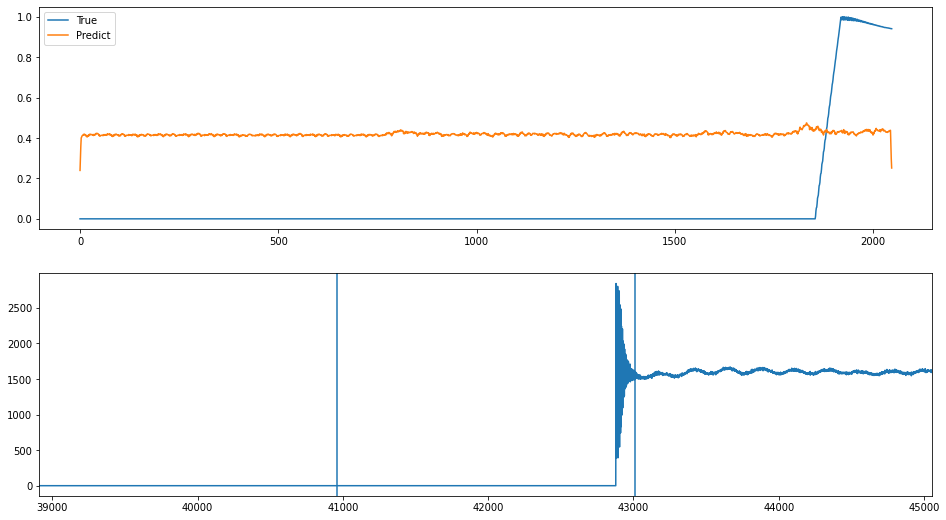

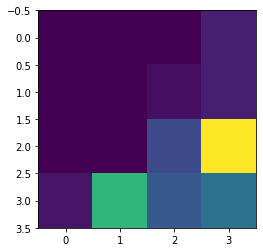

index: 202455
Error: 0.1757781913476495
type                                                         Inst
fill                                                         6611
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-25 09:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6611/...
n_bunches                                                     315
bunch_index                                                   445
bunch_number                                                   45
ts_length                                                   65536
chunk                                                          10
Name: 2789, dtype: object


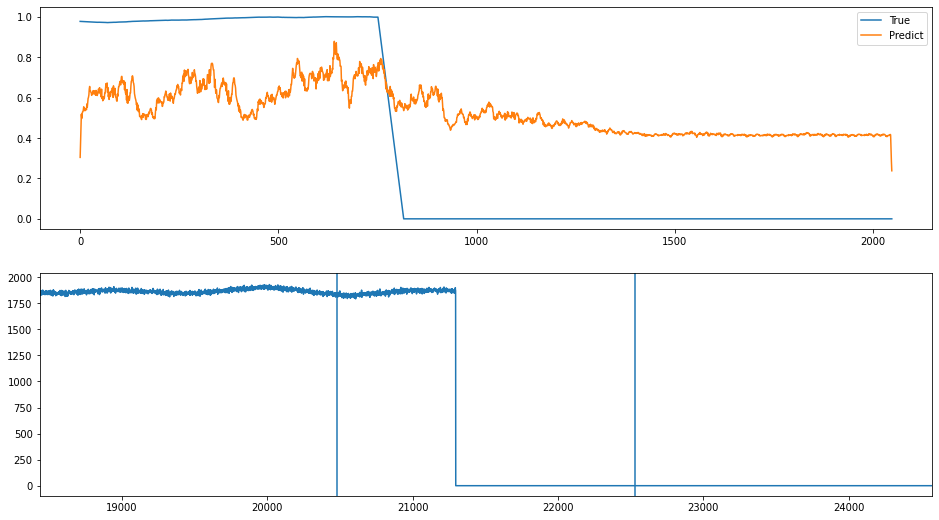

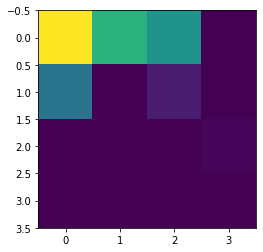

index: 85098
Error: 0.17265332252885532
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                  2097
bunch_number                                                 1157
ts_length                                                   65536
chunk                                                          12
Name: 3113, dtype: object


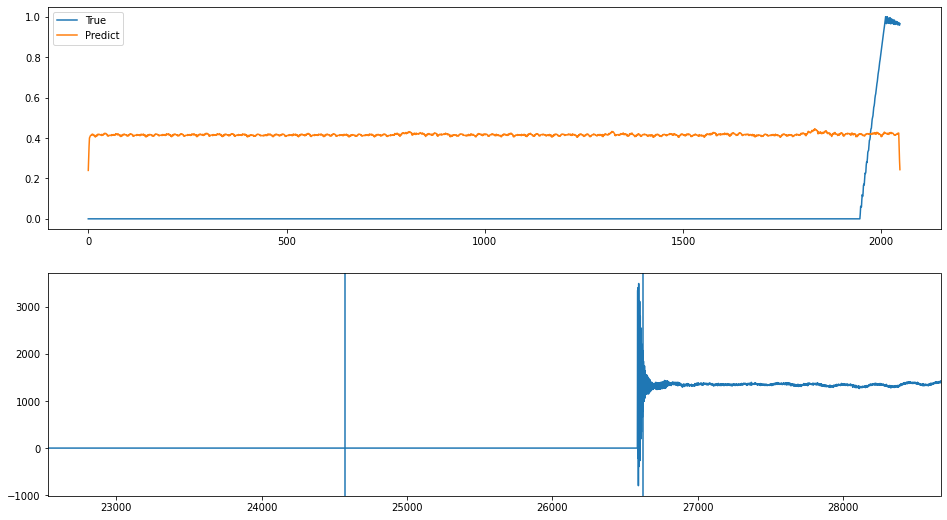

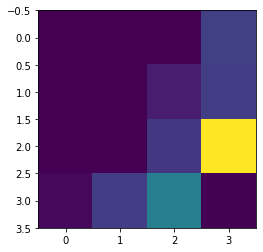

index: 78636
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 13:13:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                     652
bunch_index                                                  1030
bunch_number                                                  544
ts_length                                                   65536
chunk                                                           5
Name: 1486, dtype: object


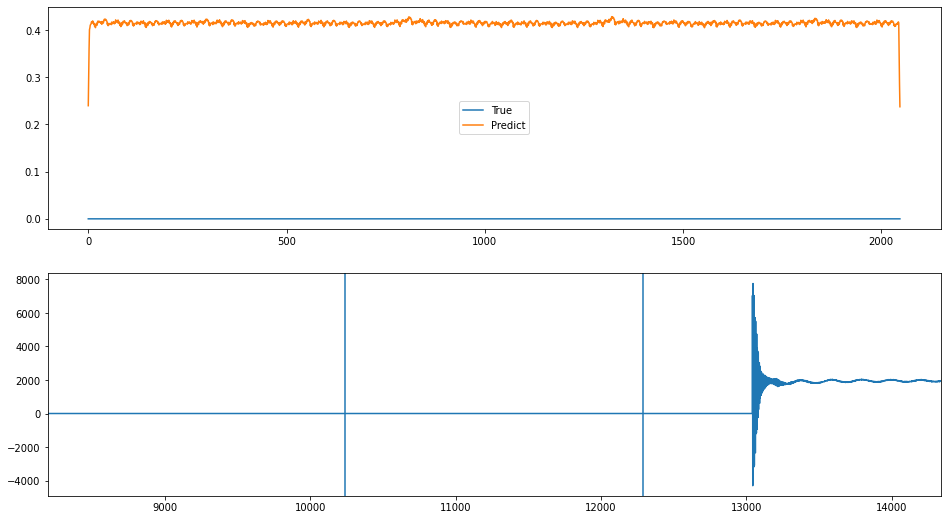

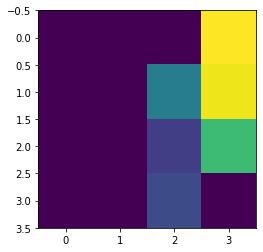

index: 88881
Error: 0.1716088224888661
type                                                         Inst
fill                                                         7345
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 07:00:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7345/...
n_bunches                                                     540
bunch_index                                                   659
bunch_number                                                  475
ts_length                                                   65536
chunk                                                           5
Name: 1397, dtype: object


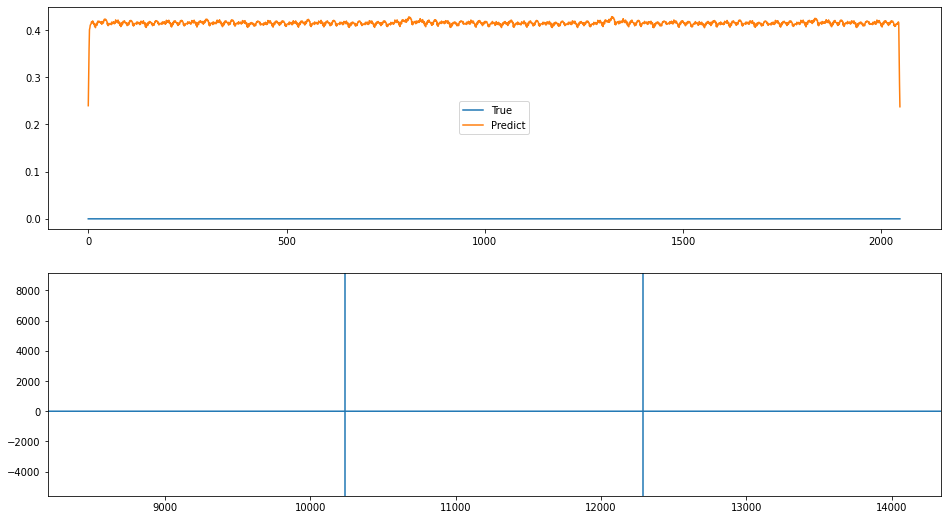

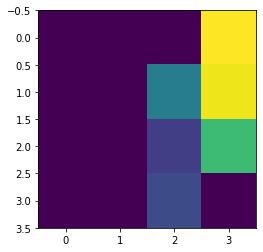

index: 208267
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6344
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-28 21:13:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6344/...
n_bunches                                                     428
bunch_index                                                   694
bunch_number                                                  376
ts_length                                                   65536
chunk                                                           2
Name: 575, dtype: object


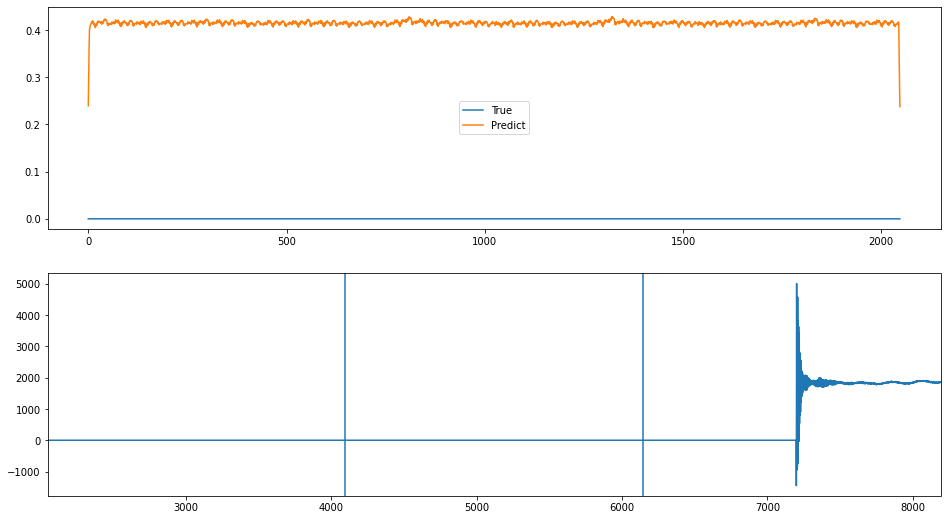

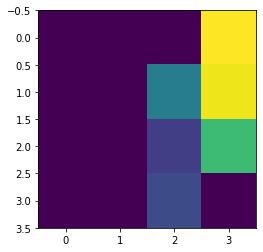

index: 182760
Error: 0.1716088224888661
type                                                         Inst
fill                                                         7334
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-23 15:07:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7334/...
n_bunches                                                     540
bunch_index                                                   610
bunch_number                                                  433
ts_length                                                   65536
chunk                                                           3
Name: 955, dtype: object


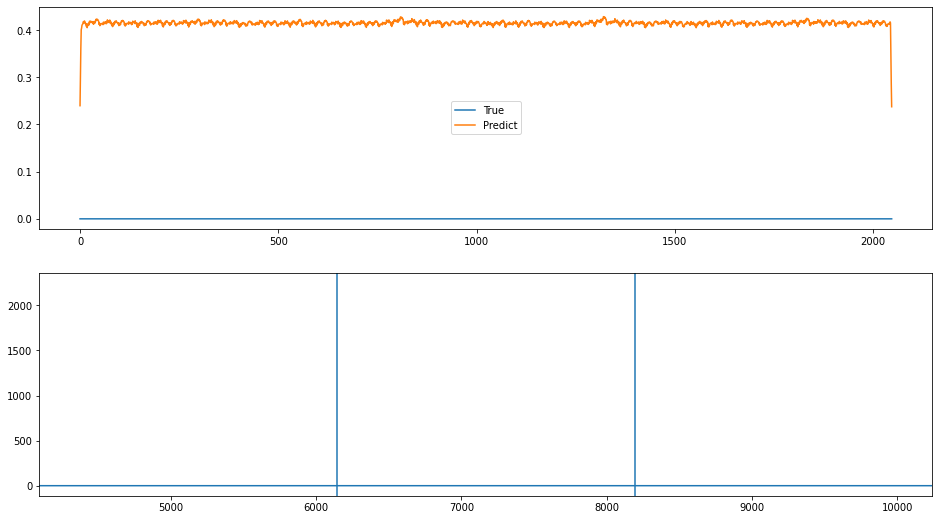

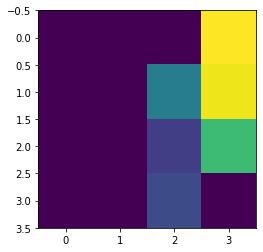

index: 88904
Error: 0.1716088224888661
type                                                         Inst
fill                                                         7483
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-29 01:24:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...
n_bunches                                                     372
bunch_index                                                  1851
bunch_number                                                  342
ts_length                                                   65536
chunk                                                           3
Name: 938, dtype: object


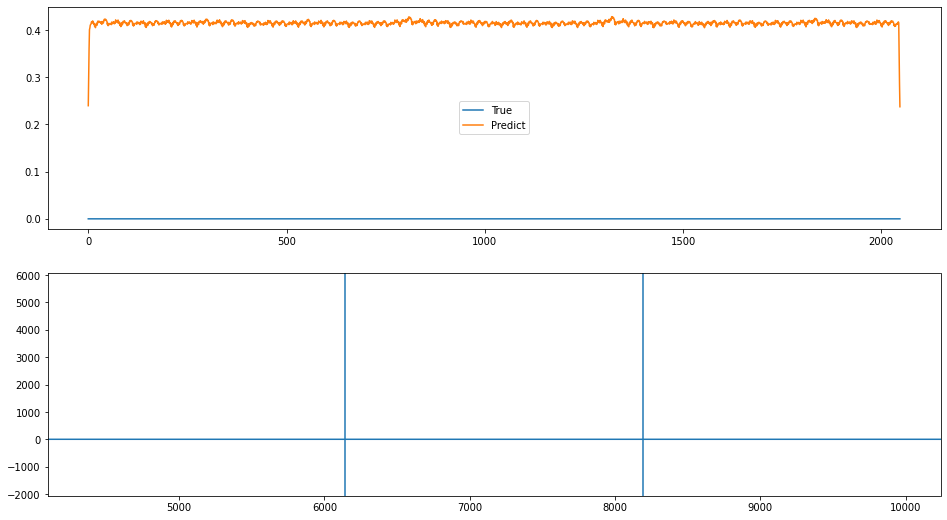

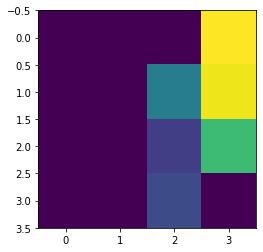

index: 199000
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:16:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                     524
bunch_index                                                   843
bunch_number                                                  442
ts_length                                                   65536
chunk                                                           5
Name: 1306, dtype: object


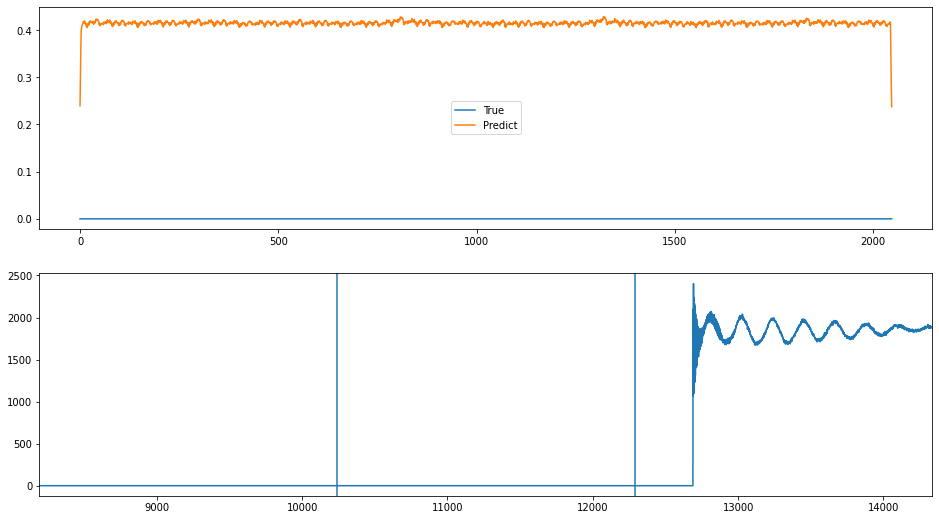

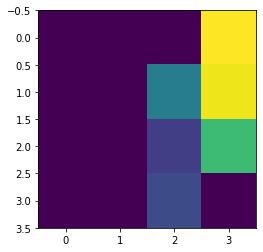

index: 110850
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6355
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 18:25:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...
n_bunches                                                    1004
bunch_index                                                  1812
bunch_number                                                  970
ts_length                                                   65536
chunk                                                           5
Name: 1358, dtype: object


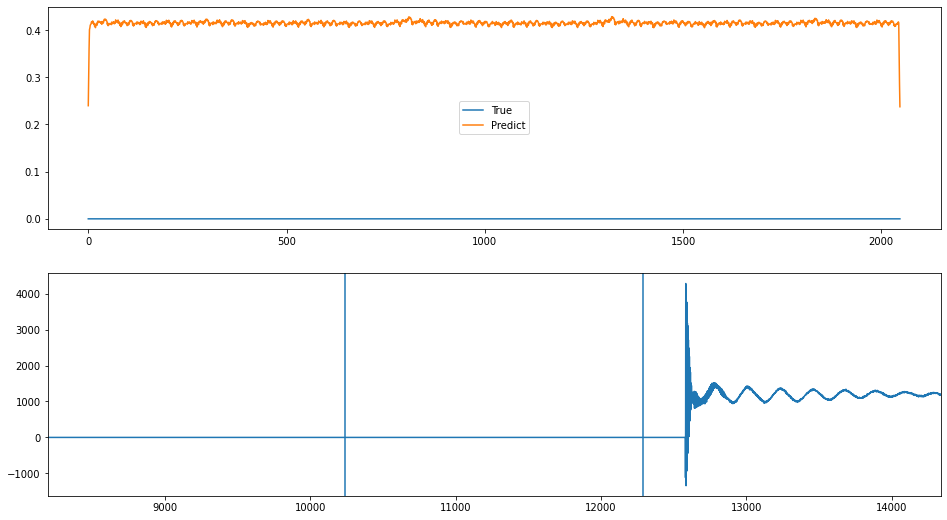

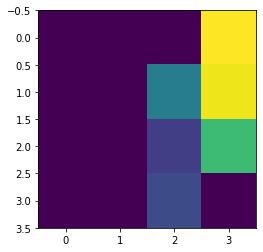

index: 182755
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  1082
bunch_number                                                  218
ts_length                                                   65536
chunk                                                          27
Name: 7036, dtype: object


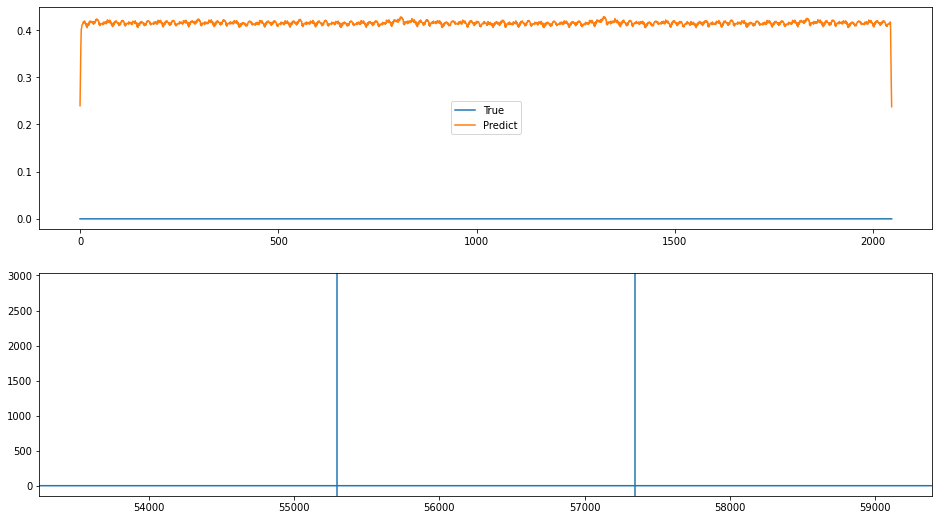

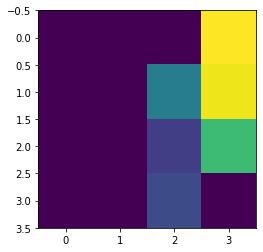

index: 373305
Error: 0.1716088224888661
type                                                         Inst
fill                                                         7328
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-21 21:51:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7328/...
n_bunches                                                     108
bunch_index                                                    88
bunch_number                                                   39
ts_length                                                   65536
chunk                                                           8
Name: 2133, dtype: object


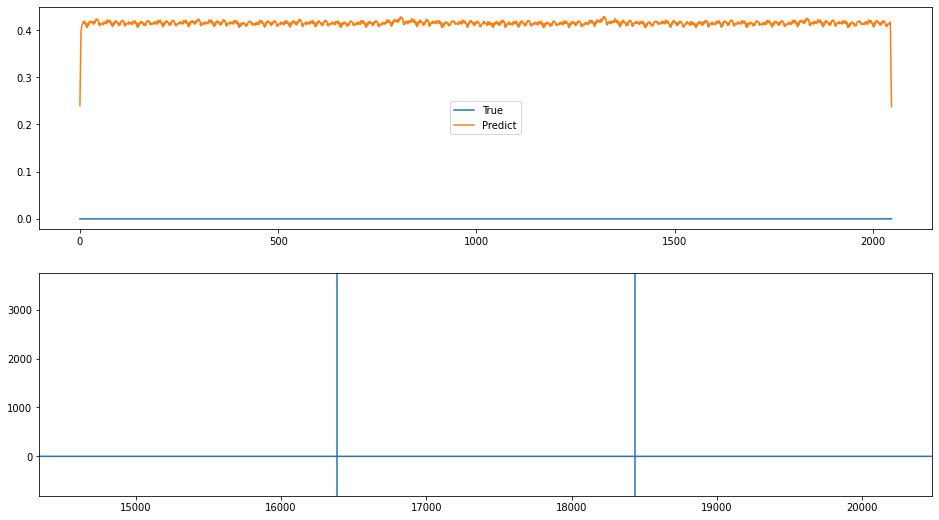

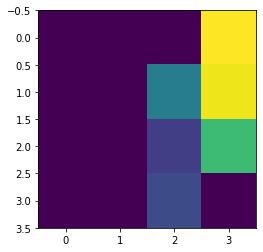

index: 358694
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:27:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     780
bunch_index                                                  1351
bunch_number                                                  713
ts_length                                                   65536
chunk                                                           0
Name: 221, dtype: object


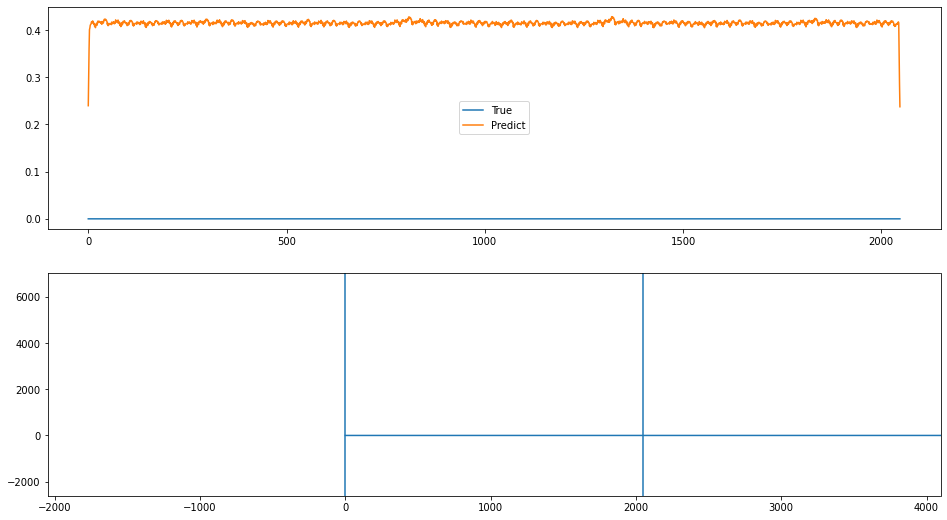

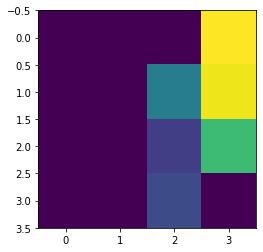

index: 256974
Error: 0.1716088224888661
type                                                         Inst
fill                                                         7238
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-30 11:11:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7238/...
n_bunches                                                     252
bunch_index                                                  1047
bunch_number                                                  192
ts_length                                                   65536
chunk                                                          12
Name: 3311, dtype: object


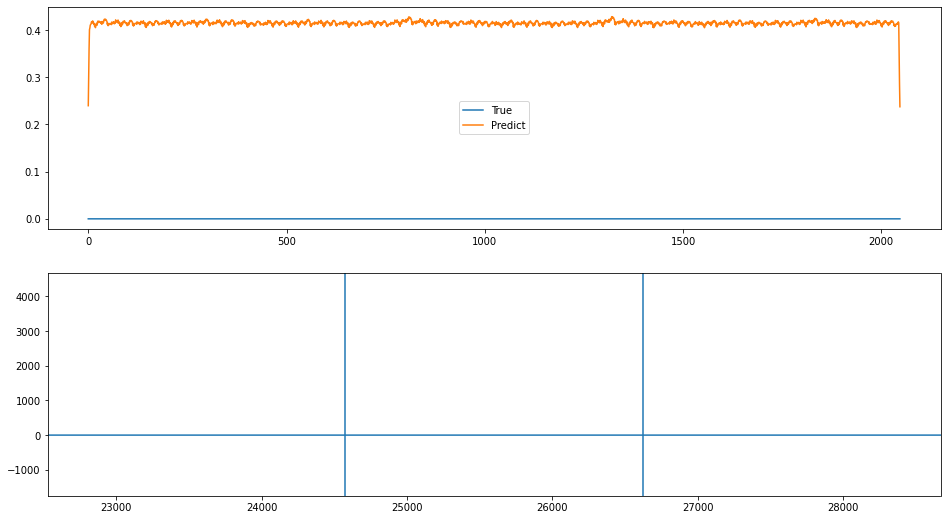

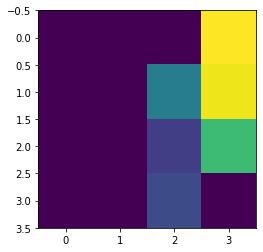

index: 17546
Error: 0.1716088224888661
type                                                         Inst
fill                                                         7261
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-06 17:22:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7261/...
n_bunches                                                     120
bunch_index                                                   392
bunch_number                                                   30
ts_length                                                   65536
chunk                                                          18
Name: 4856, dtype: object


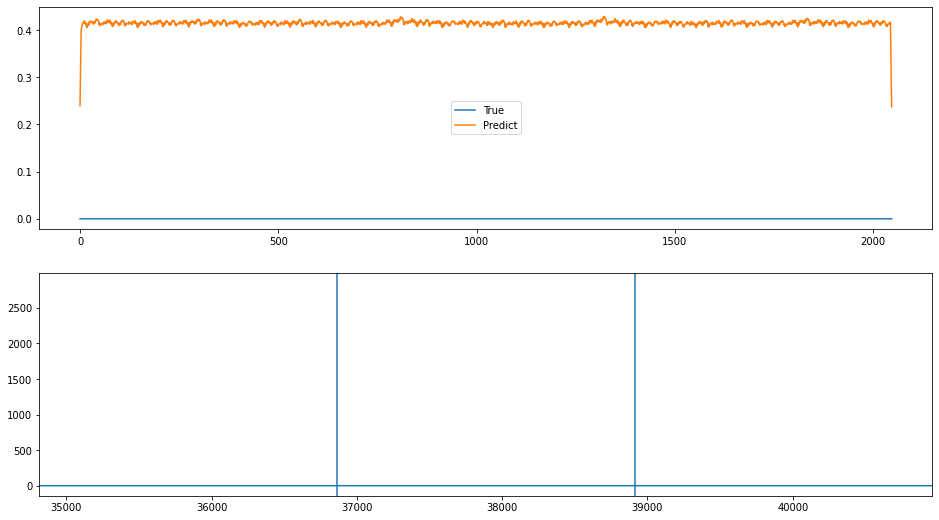

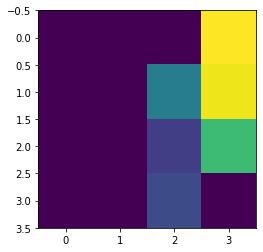

index: 358709
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:38:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                    1596
bunch_index                                                  2093
bunch_number                                                 1554
ts_length                                                   65536
chunk                                                           1
Name: 382, dtype: object


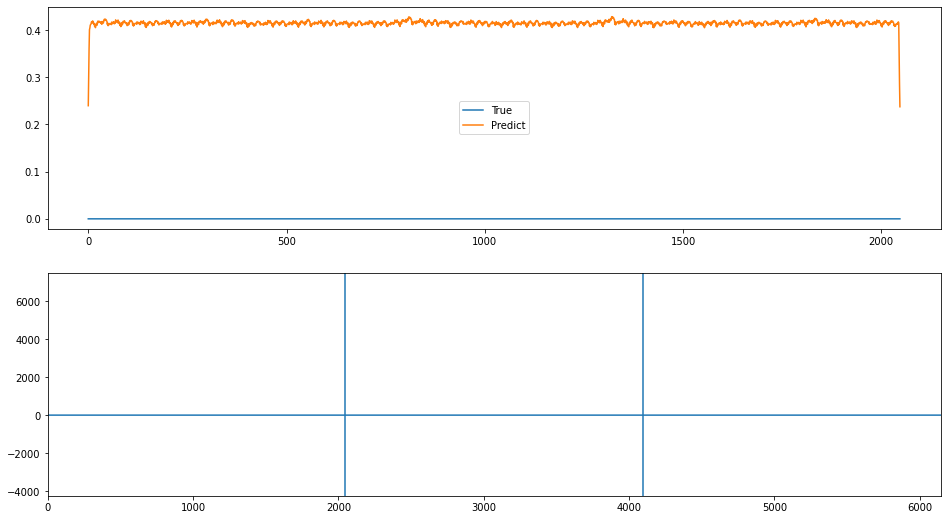

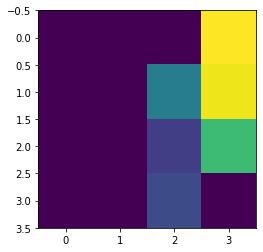

index: 330996
Error: 0.1716088224888661
type                                                         Inst
fill                                                         6442
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-01 00:00:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6442/...
n_bunches                                                     300
bunch_index                                                   493
bunch_number                                                  267
ts_length                                                   65536
chunk                                                           6
Name: 1763, dtype: object


In [ ]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [ ]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

In [ ]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [ ]:
# point = 

In [ ]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [ ]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [ ]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [ ]:
encoded_2d.shape

In [ ]:
print(encoded_2d[0])

In [ ]:
encoded_2d.min()

In [ ]:
encoded_2d.max()

In [ ]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [ ]:
import sklearn
from sklearn.manifold import TSNE

In [ ]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [ ]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(4, 12))
viz.fit(encoded_2d_pca)
viz.show()

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=4)
# clustering = dbscan.fit(encoded_2d_tsne)
# sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
# plt.legend(*sc.legend_elements())
# plt.show()
# for cluster in np.unique(clustering.labels_):
#     cluster_indices = np.where(clustering.labels_ == cluster)[0]
#     print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
#     plt.show()
#     plot_avg_encoding(cluster_indices)
#     plt.show()